In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
PATH_SOCCER = 'Rede Politica/'
PATH_USERS_SUSPENDED = 'usuarios suspensos politica/'

In [3]:
# load tweets summary
dicio_trad = {}
with open(PATH_SOCCER+'/traducao_retweets_politica','r') as arq_reader:
    for lines in arq_reader:
        node_name,node_id = lines.strip().split(":")
        dicio_trad[node_name] = node_id
    
#load tweets
        

In [4]:
# load users list
def load_users(filename):
    users_list = []
    with open(PATH_USERS_SUSPENDED+filename,'r') as arq_reader:
        users_list = [line.strip() for line in arq_reader]
    return users_list

In [5]:
# load users suspended
users_suspended = load_users("users_suspended.txt")
# load users valid
users_valids = load_users("users_valid.txt")

In [6]:
count_suspended = len(users_suspended)
count_valid= len(users_valids)
total_users = count_suspended + count_valid
print("Usuários Totais:",total_users)
print("Usuários suspensos:",count_suspended)
print("Usuários Validos:",count_valid)

Usuários Totais: 230233
Usuários suspensos: 142971
Usuários Validos: 87262


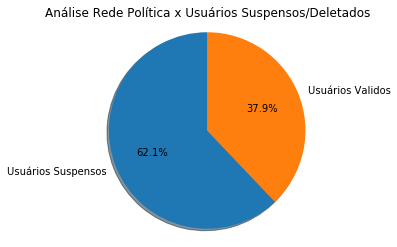

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Usuários Suspensos','Usuários Validos'
sizes = [count_suspended,count_valid]

fig1, ax1 = plt.subplots()
ax1.set_title("Análise Rede Política x Usuários Suspensos/Deletados")
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig("analise_politica.png")
plt.show()

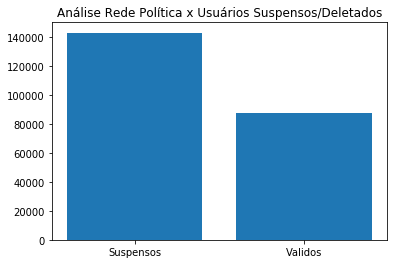

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Suspensos','Validos']
sizes = [count_suspended,count_valid]

fig1, ax1 = plt.subplots()
ax1.set_title("Análise Rede Política x Usuários Suspensos/Deletados")
ax1.bar(labels,sizes)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#fig1.savefig("analise_futebol.png")
plt.show()

In [9]:
grafo = nx.read_edgelist(PATH_SOCCER+'/retweets_politica.edgelist',create_using=nx.DiGraph)
print(nx.info(grafo))

Name: 
Type: DiGraph
Number of nodes: 230233
Number of edges: 451275
Average in degree:   1.9601
Average out degree:   1.9601


In [10]:
users_suspend_ids = [dicio_trad.get(user) for user in users_suspended if user in dicio_trad]

In [11]:
novo_grafo = grafo.copy()
novo_grafo.remove_nodes_from(users_suspend_ids)
print(nx.info(novo_grafo))

nx.write_edgelist(novo_grafo, "retweets_politica_nao_suspenso.edgelist",data=False)
nx.write_gml(novo_grafo,"retweets_politica_nao_suspenso.gml")

Name: 
Type: DiGraph
Number of nodes: 87262
Number of edges: 87285
Average in degree:   1.0003
Average out degree:   1.0003


In [12]:
grafo_direct = nx.read_edgelist('retweets_politica_nao_suspenso.edgelist',create_using=nx.DiGraph)

In [13]:
print(nx.info(grafo_direct))

Name: 
Type: DiGraph
Number of nodes: 57683
Number of edges: 87285
Average in degree:   1.5132
Average out degree:   1.5132
